In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import patsy
import statsmodels.api as sm

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [86]:
from mpl_toolkits import mplot3d

# Clean & Filter Dataset

In [59]:
df = pd.read_csv('Datasets/games-features.csv')
df['ReleaseDate'] = pd.to_datetime(df['ReleaseDate'], errors='coerce')
df = df.loc[df['ReleaseDate'].notnull()]
df = df.loc[df['GenreIsNonGame'] == False]
# CONSIDER DROPPING GAMES THAT HAVEN'T BEEN OWNED
df = df.loc[df['SteamSpyOwners'] > 0]
df = df.drop(columns=['QueryID', 'ResponseID', 'QueryName', 'PackageCount',
                      'AchievementHighlightedCount', 'AchievementCount', 'ControllerSupport', 'PCReqsHaveMin',
                      'PCReqsHaveRec', 'LinuxReqsHaveMin', 'LinuxReqsHaveRec', 'MacReqsHaveMin',
                      'MacReqsHaveRec', 'SupportEmail', 'SupportURL', 'ExtUserAcctNotice',
                      'HeaderImage', 'LegalNotice', 'Website', 'PCMinReqsText',
                      'PCRecReqsText', 'LinuxMinReqsText', 'LinuxRecReqsText', 'MacMinReqsText',
                      'MacRecReqsText'])
# log of Stea
df['log_owners'] = np.log(df['SteamSpyOwners'])
df.head()

,ResponseName,ReleaseDate,RequiredAge,DemoCount,DeveloperCount,DLCCount,Metacritic,MovieCount,RecommendationCount,PublisherCount,...,PriceInitial,PriceFinal,AboutText,Background,ShortDescrip,DetailedDescrip,DRMNotice,Reviews,SupportedLanguages,log_owners
0,Counter-Strike,2000-11-01,0,0,1,0,88,0,68991,1,...,9.99,9.99,Play the worlds number 1 online action game. E...,http://cdn.akamai.steamstatic.com/steam/apps/1...,,Play the worlds number 1 online action game. E...,,,English French German Italian Spanish Simplifi...,16.383021
1,Team Fortress Classic,1999-04-01,0,0,1,0,0,0,2439,1,...,4.99,4.99,One of the most popular online action games of...,http://cdn.akamai.steamstatic.com/steam/apps/2...,,One of the most popular online action games of...,,,English French German Italian Spanish,15.501750
2,Day of Defeat,2003-05-01,0,0,1,0,79,0,2319,1,...,4.99,4.99,Enlist in an intense brand of Axis vs. Allied ...,http://cdn.akamai.steamstatic.com/steam/apps/3...,,Enlist in an intense brand of Axis vs. Allied ...,,,English French German Italian Spanish,15.846432
3,Deathmatch Classic,2001-06-01,0,0,1,0,0,0,888,1,...,4.99,4.99,Enjoy fast-paced multiplayer gaming with Death...,http://cdn.akamai.steamstatic.com/steam/apps/4...,,Enjoy fast-paced multiplayer gaming with Death...,,,English French German Italian Spanish,15.830276
4,Half-Life: Opposing Force,1999-11-01,0,0,1,0,0,0,2934,1,...,4.99,4.99,Return to the Black Mesa Research Facility as ...,http://cdn.akamai.steamstatic.com/steam/apps/5...,,Return to the Black Mesa Research Facility as ...,,,English French German Korean,15.501817


In [60]:
def quarter(x):
    if np.isnan(x['ReleaseMonth']):
        return x['ReleaseMonth']
    else:
        val = x['ReleaseMonth'] / 3
        if ((val * 100) %  100 >= 50) | ((val * 100) % 100 == 0):
            return round(val)
        else:
            return round(val) + 1

In [61]:
df['ReleaseDate'] = pd.to_datetime(df['ReleaseDate'], errors='coerce')
df['ReleaseMonth'] = df['ReleaseDate'].dt.month
df['ReleaseYear'] = df['ReleaseDate'].dt.year
df['ReleaseQuarter'] = df.apply(quarter, axis = 1)

# Release Year V.S. Log_Owners

In [62]:
outcome, predictors = patsy.dmatrices("log_owners ~ ReleaseYear", df)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             log_owners   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     2766.
Date:                Tue, 17 Nov 2020   Prob (F-statistic):               0.00
Time:                        15:17:28   Log-Likelihood:                -20810.
No. Observations:               10219   AIC:                         4.162e+04
Df Residuals:                   10217   BIC:                         4.164e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     842.7395     15.834     53.222      

In [64]:
x_train, x_test, y_train, y_test = train_test_split(np.array(df['ReleaseYear']), 
                                                    np.array(df['log_owners']), test_size = 0.3)

In [66]:
reg = LinearRegression()
#Fit
reg.fit(np.reshape(x_train, (-1,1)), np.reshape(y_train, (-1, 1)))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

R^2 score:  0.2085172299311152


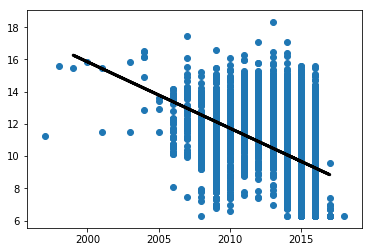

In [67]:
predicted = reg.predict(np.reshape(x_test, (-1,1)))
#R^2
print('R^2 score: ', reg.score(np.reshape(x_train, (-1,1)), np.reshape(y_train, (-1, 1))))
#Plot regression line and scatter
import matplotlib.pyplot as plt
plt.plot(x_test, predicted, color = 'black', linewidth = 3)
plt.scatter(x = x_train, y= y_train)
#plt.xlabel('')
#plt.ylabel('')
plt.show()


In [68]:
print('Intercept: \n', reg.intercept_)
print('Coefficients: \n', reg.coef_)

Intercept: 
 [840.18562003]
Coefficients: 
 [[-0.41216568]]


In [69]:
mean_squared_error(y_test, predicted)

3.3321564188920494

# Metacritic V.S SteamSpyOwners

In [72]:
x_train, x_test, y_train, y_test = train_test_split(df[['ReleaseYear', 'Metacritic']], df['SteamSpyOwners'], test_size = 0.3)

In [73]:
reg = LinearRegression()
#Fit
reg.fit(x_train, y_train)

print('Intercept: \n', reg.intercept_)
print('Coefficients: \n', reg.coef_)


Intercept: 
 140848354.2564435
Coefficients: 
 [-69862.30331495   5661.28342772]


In [74]:
predicted = reg.predict(x_test)
#R^2
print('R^2 score: ', reg.score(x_train, y_train))
mean_squared_error(y_test, predicted)

R^2 score:  0.038884162130930267


660888476253.476

# Metacritic V.S Log_Owners

In [75]:
subset = df.loc[df['Metacritic'] != 0]

In [76]:
outcome, predictors = patsy.dmatrices("log_owners ~ Metacritic", subset)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             log_owners   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     441.7
Date:                Tue, 17 Nov 2020   Prob (F-statistic):           1.50e-89
Time:                        15:20:36   Log-Likelihood:                -4266.4
No. Observations:                2212   AIC:                             8537.
Df Residuals:                    2210   BIC:                             8548.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0071      0.231     30.273      0.0

R^2 score:  0.15578870301368974


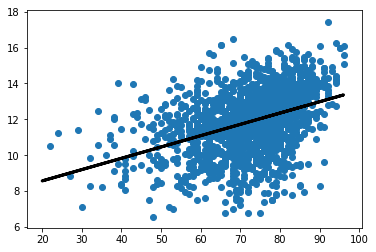

In [77]:
x_train, x_test, y_train, y_test = train_test_split(np.array(subset['Metacritic']), 
                                                    np.array(subset['log_owners']), test_size = 0.3)
reg = LinearRegression()
#Fit
reg.fit(np.reshape(x_train, (-1,1)), np.reshape(y_train, (-1, 1)))
predicted = reg.predict(np.reshape(x_test, (-1,1)))
#R^2
print('R^2 score: ', reg.score(np.reshape(x_train, (-1,1)), np.reshape(y_train, (-1, 1))))
#Plot regression line and scatter
import matplotlib.pyplot as plt
plt.plot(x_test, predicted, color = 'black', linewidth = 3)
plt.scatter(x = x_train, y= y_train)
#plt.xlabel('Difference in numbers of people between male and female')
#plt.ylabel('Total Housing Price')
plt.show()

In [78]:
print('Intercept: \n', reg.intercept_)
print('Coefficients: \n', reg.coef_)

Intercept: 
 [7.30404943]
Coefficients: 
 [[0.06307977]]


In [79]:
mean_squared_error(y_test, predicted)

2.9223909521784805

# Release Year & Metacritic (Non-Zero) V.S. Log_Owners

In [81]:
outcome, predictors = patsy.dmatrices("log_owners ~ ReleaseYear + Metacritic", subset)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             log_owners   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     364.6
Date:                Tue, 17 Nov 2020   Prob (F-statistic):          1.49e-137
Time:                        15:21:37   Log-Likelihood:                -4152.4
No. Observations:                2212   AIC:                             8311.
Df Residuals:                    2209   BIC:                             8328.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     384.3255     24.370     15.771      

In [83]:
x_train, x_test, y_train, y_test = train_test_split(subset[['ReleaseYear', 'Metacritic']], 
                                                    np.array(subset['log_owners']), test_size = 0.3)
reg = LinearRegression()
#Fit
reg.fit(x_train, np.reshape(y_train, (-1, 1)))
predicted = reg.predict(x_test)
#R^2
print('R^2 score: ', reg.score(x_train, np.reshape(y_train, (-1, 1))))
plt.show()

R^2 score:  0.22966064857849902


In [133]:
print('Intercept: \n', reg.intercept_)
print('Coefficients: \n', reg.coef_[0])

Intercept: 
 [398.15393985]
Coefficients: 
 [-0.19396982  0.05528569]


In [134]:
fit_line = reg.coef_[0, 0] * xline + reg.coef_[0, 1] * yline + reg.intercept_

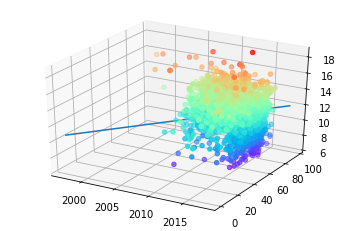

In [135]:
fig = plt.figure()
ax = plt.axes(projection='3d')
xline = np.linspace(df['ReleaseYear'].min(), df['ReleaseYear'].max(), len(df['ReleaseYear']))
yline = np.linspace(df['Metacritic'].min(), df['Metacritic'].max(), len(df['ReleaseYear']))
zline = np.linspace(fit_line.min(), fit_line.max(), len(fit_line))
ax.plot(xline, yline, zline)
zdata = subset['log_owners']
ydata = subset['Metacritic']
xdata = subset['ReleaseYear']
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='rainbow');
plt.show()

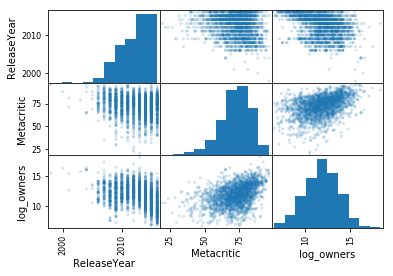

In [137]:
pd.plotting.scatter_matrix(subset[['ReleaseYear', 'Metacritic', 'log_owners']], alpha=0.2)
plt.show()

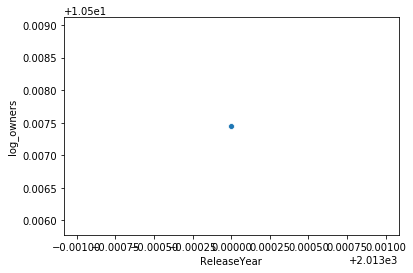

In [145]:
sns.scatterplot(x = 'ReleaseYear', y = 'log_owners', data = subset.loc[subset['Metacritic'] == 20])

 # RecommendationCountLog V.S Log_Owners

In [149]:
subset = df.loc[df['RecommendationCount'] != 0].copy()
subset['RecommendationCountLog'] = np.log(subset['RecommendationCount'])

In [150]:
outcome, predictors = patsy.dmatrices("log_owners ~ RecommendationCountLog", subset)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             log_owners   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     8248.
Date:                Tue, 17 Nov 2020   Prob (F-statistic):               0.00
Time:                        15:55:23   Log-Likelihood:                -6657.1
No. Observations:                4776   AIC:                         1.332e+04
Df Residuals:                    4774   BIC:                         1.333e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  5

R^2 score:  0.6349867199891055


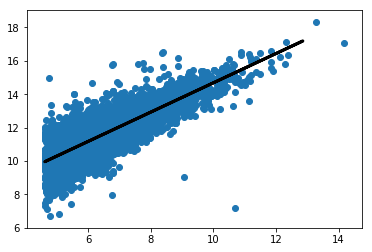

In [151]:
x_train, x_test, y_train, y_test = train_test_split(np.array(subset['RecommendationCountLog']), 
                                                    np.array(subset['log_owners']), test_size = 0.3)
reg = LinearRegression()
#Fit
reg.fit(np.reshape(x_train, (-1,1)), np.reshape(y_train, (-1, 1)))
predicted = reg.predict(np.reshape(x_test, (-1,1)))
#R^2
print('R^2 score: ', reg.score(np.reshape(x_train, (-1,1)), np.reshape(y_train, (-1, 1))))
#Plot regression line and scatter
import matplotlib.pyplot as plt
plt.plot(x_test, predicted, color = 'black', linewidth = 3)
plt.scatter(x = x_train, y= y_train)
#plt.xlabel('Difference in numbers of people between male and female')
#plt.ylabel('Total Housing Price')
plt.show()

In [152]:
print('Intercept: \n', reg.intercept_)
print('Coefficients: \n', reg.coef_)

Intercept: 
 [5.89275301]
Coefficients: 
 [[0.87870746]]


In [153]:
mean_squared_error(y_test, predicted)

0.946210122455168

# Release Year & Metacritic (Non-Zero) & RecommendationCountLog V.S. Log_Owners

In [156]:
subset = subset.loc[subset['Metacritic'] != 0]
outcome, predictors = patsy.dmatrices("log_owners ~ ReleaseYear + Metacritic + RecommendationCountLog", subset)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             log_owners   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     2529.
Date:                Tue, 17 Nov 2020   Prob (F-statistic):               0.00
Time:                        15:58:41   Log-Likelihood:                -1875.8
No. Observations:                1800   AIC:                             3760.
Df Residuals:                    1796   BIC:                             3782.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                395

In [162]:
x_train, x_test, y_train, y_test = train_test_split(subset[['ReleaseYear', 'Metacritic', 'RecommendationCountLog']], 
                                                    np.array(subset['log_owners']), test_size = 0.3)
reg = LinearRegression()
#Fit
reg.fit(x_train, np.reshape(y_train, (-1, 1)))
predicted = reg.predict(x_test)
#R^2
print('R^2 score: ', reg.score(x_train, np.reshape(y_train, (-1, 1))))
plt.show()

R^2 score:  0.805355249968003


In [158]:
print('Intercept: \n', reg.intercept_)
print('Coefficients: \n', reg.coef_[0])

Intercept: 
 [385.37434947]
Coefficients: 
 [-0.1884503   0.00782109  0.78999861]


In [159]:
mean_squared_error(y_test, predicted)

0.49859595910357696